## Part I.

### A1. Research Question

Can we predict customer's sentiments using neural network and NLP techniques to provide insights for our company so that proper measures can be taken regarding customer reviews?

### A2. Objectives and Goals

The objective of this project is to build a neural network model to train and test the dataset to identify positive and negative reviews using text classification. The goal of the project is to see if the model can accurately predict reviews that are positive or negative.

### A2. Prescribed Network

For this project, we will be using Tensorflow and the Keras libraries as they are industry-relevant for training neural networks such as RNN. RNN is the neural network that we will be performing our task as it is relevant for natural language processing. Since we are with working strings of data that come in sequences, this makes RNN ideal for our analysis (Elleh, n.d.).

## Part II

### B1: Data Preparation.

For our exploratory analysis, an initial review of the dataset revealed that there were unusual characters such as punctuations, and non-english words such as emojis. Once we identified the unusual characters, we apply lambda to remove and rechecked the dataset to see if there are still any unusual characters left. This code has been labeled in the dataset as "B1.a. Unusual Character Removal."

The vocab size is defined as the number of unique words in our dataset. The size was found to be 18743. This code has been labeled in the dataset as "B1.b. Vocab Size Calculation."

Word embedding is the position of the word in learned vector space. The embedding length calculation was proposed using the square root of the square root of vocab size which gave us 12 (Elleh, n.d.). This code has been labeled in the dataset as "B1.c. Proposed Embedding Length."

The maximum sequence length is chosen based on its ability to preserve available input data so that the model doesn't produce results that are not easy to understand. First, we calculated the average char length and plotted a histogram. Then we used the code provided by Dr. Elleh to calculate and statistically justify the max sequence length which was 70. This code has been labeled in the dataset as "B1.d. Stasticial Justification of Seq. Length" for verification.

All data preparation was performed using the codes below.

#Install and ensure we have the libraries needed. Has been Markdown for faster execution of code
!pip install numpy
!pip install scipy
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install pandas
!pip install nltk
!pip install tensorflow
!pip install wordcloud
!pip install imbalanced-learn
!pip install scikit-learn imbalanced-learn
!pip install --upgrade scikit-learn
!pip install --upgrade imbalanced-learn


In [1]:
# Import libraries needed.
import numpy as np
import pandas as pd
from pandas import DataFrame

#Import Stats Models
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

#Import Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

#Import JSON
from pathlib import Path
import json
from dateutil.parser import parse

#Import Preprocessing Functions
import re
import nltk
import keras
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet
from nltk.probability import FreqDist
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix,classification_report

#Import Model Use Libraries
from keras.callbacks import EarlyStopping


In [2]:
#Download nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GOD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\GOD\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\GOD\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
#Check Tensorflow version
tf.__version__

'2.13.0'

In [4]:
# Importing data
df = pd.read_json('Musical_Instruments_5.json', orient='columns', lines = True)

df1.head()

In [5]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [6]:
# New dataframe for targeted Columns
df_1= df[['overall','reviewText']].copy()
df_1.head()

,overall,reviewText
0,5,"Not much to write about here, but it does exac..."
1,5,The product does exactly as it should and is q...
2,5,The primary job of this device is to block the...
3,5,Nice windscreen protects my MXL mic and preven...
4,5,This pop filter is great. It looks and perform...


In [7]:
# Renaming columns
df_1 = df_1.rename(columns={'overall' : 'Score', 'reviewText': 'Review'})
print(df_1.head())
print(df_1.tail())

   Score                                             Review
0      5  Not much to write about here, but it does exac...
1      5  The product does exactly as it should and is q...
2      5  The primary job of this device is to block the...
3      5  Nice windscreen protects my MXL mic and preven...
4      5  This pop filter is great. It looks and perform...
       Score                                             Review
10256      5            Great, just as expected.  Thank to all.
10257      5  I've been thinking about trying the Nanoweb st...
10258      4  I have tried coated strings in the past ( incl...
10259      4  Well, MADE by Elixir and DEVELOPED with Taylor...
10260      4  These strings are really quite good, but I wou...


In [8]:
# Checking for null values
df_1.isna().sum()

Score     0
Review    0
dtype: int64

In [9]:
#Find and drop null values
df_1 = df_1.dropna(subset=['Review'])
df_1.isna().sum()

Score     0
Review    0
dtype: int64

In [10]:
#Lowercase all words in Review Column
df_1['Review'] = df_1['Review'].str.lower()
df_1

,Score,Review
0,5,"not much to write about here, but it does exac..."
1,5,the product does exactly as it should and is q...
2,5,the primary job of this device is to block the...
3,5,nice windscreen protects my mxl mic and preven...
4,5,this pop filter is great. it looks and perform...
...,...,...
10256,5,"great, just as expected. thank to all."
10257,5,i've been thinking about trying the nanoweb st...
10258,4,i have tried coated strings in the past ( incl...
10259,4,"well, made by elixir and developed with taylor..."


### B1.a: Unusual Character Removal

The code to remove unusual characters is listed below.

In [11]:
pd.set_option('display.max_colwidth', 5000)
print(df.head())

       reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName   helpful  \
0  cassandra tu "Yeah, well, that's just like, u...    [0, 0]   
1                                              Jake  [13, 14]   
2                     Rick Bennette "Rick Bennette"    [1, 1]   
3                         RustyBill "Sunday Rocker"    [0, 0]   
4                                     SEAN MASLANKA    [0, 0]   

                                                                                                                                                                                                                                                                                                                                                                                                                          

In [12]:
#Review Characters
commentary = df_1['Review']

list_of_characters =[]
for comment in commentary:
        for character in comment:
                if character not in list_of_characters:
                        list_of_characters.append(character)
print(list_of_characters)

['n', 'o', 't', ' ', 'm', 'u', 'c', 'h', 'w', 'r', 'i', 'e', 'a', 'b', ',', 'd', 's', 'x', 'l', 'y', "'", 'p', '.', 'f', 'g', 'z', 'k', 'q', 'v', ':', 'j', '!', ']', '1', '9', '8', '0', '$', '3', '5', '2', '-', '/', '4', '(', ')', '6', '?', ';', '&', '#', '+', '"', '*', '=', '_', '7', '%', '[', '~', '@', '`', '\\', '^', '>', '}', '|', '{']


In [13]:
#Remove Special Characters, numbers, and Emojis like pattern characters(ie. :D)
df_1['Review'] = df_1['Review'].str.replace('\W', ' ', regex=True) #special characters
df_1['Review'] = df_1['Review'] .str.replace(r':\S+', '', regex=True) # removes special characters
df_1['Review'] = df_1['Review'].str.replace(r'\d', '', regex=True) #removes numerics
df_1['Review'] = df_1['Review'].str.replace('_', '') #removes underscore
df_1['Review']  = df_1['Review'] .apply(lambda text: ' '.join([word for word in text.split() if len(word) > 2])) # remove words >3 characters

In [14]:
#Review characters
commentary = df_1['Review']

list_of_characters =[]
for comment in commentary:
        for character in comment:
                if character not in list_of_characters:
                        list_of_characters.append(character)
print(list_of_characters)

['n', 'o', 't', ' ', 'm', 'u', 'c', 'h', 'w', 'r', 'i', 'e', 'a', 'b', 'd', 's', 'x', 'l', 'y', 'p', 'f', 'g', 'z', 'k', 'q', 'v', 'j']


In [15]:
# Iterate through each cell in the DataFrame to look for any unusual character and print the row if it exists
for index, row in df_1.iterrows():
    text = row['Review']
    if any(ord(char) > 127 for char in text):
        print(f"Unusual characters found in row {index}: {text}")

In [16]:
print(df_1.head())
pd.set_option('display.max_colwidth', 50)

   Score  \
0      5   
1      5   
2      5   
3      5   
4      5   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Review  
0                                                                                                                                                                                                                                       not much write about here but does exactly what supposed filters out the pop sounds now recordings are much more crisp one the lowest prices pop filters amazon might well buy they honestly work the same despite their pricing  
1  the pr

### B1.b: Vocab Size Calculation

Code has been provided below.

In [17]:
#Combine all words from the 'Review' column into a single string
all_words = ' '.join(df_1['Review']).split()

# Initial Vocabulary size for Data Exploration
vocab_size = len(set(all_words))+1### B1: Unusual Character Removal
print(vocab_size)

18743


### B1.c: Proposed Word Embedding Length

The calculation was provided below.

In [18]:
#Calculate the embedding dimensions based on sqrt of sqrt of vocab_size
embedding_d = int(round(np.sqrt(np.sqrt(vocab_size)), 0))
print('Embedding Length: ',embedding_d)

Embedding Length:  12


### B1.d: Statistical Justification of Seq. Length

The calculation of max sequence length has been provided in the code below.

In [19]:
#Calculate Average Char. Length
char_lens = [len(sentence) for sentence in df_1['Review']]
mean_char_len = np.mean(char_lens)
print(mean_char_len)

408.00068219471785


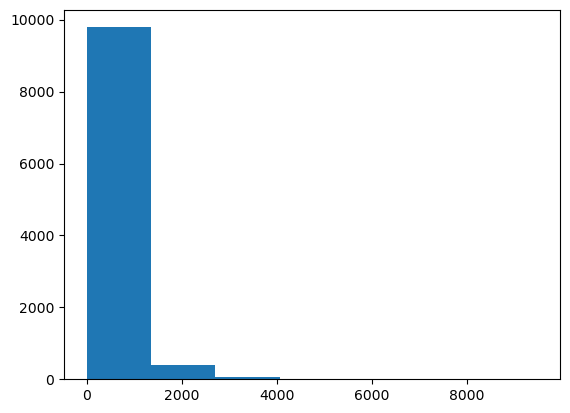

In [20]:
# Check the distribution of our sequences at character-level
import matplotlib.pyplot as plt
plt.hist(char_lens, bins=7);

In [21]:
#Calculate Sequence Length
review_length = []
for review in df_1.Review:
    review_length.append(len(review.split(' ')))
    
max_sequence_length = int(round(np.mean(review_length), 0))
print('Max length: ', max_sequence_length)

Max length:  70


In [22]:
#Transform 1-2 as negative and 3-5 as positive.
df_1['Sentiments'] = df_1.Score.apply(lambda x: 0 if x in [1, 2] else 1)
print(df_1.head())
print(df_1.tail())

   Score                                             Review  Sentiments
0      5  not much write about here but does exactly wha...           1
1      5  the product does exactly should and quite affo...           1
2      5  the primary job this device block the breath t...           1
3      5  nice windscreen protects mxl mic and prevents ...           1
4      5  this pop filter great looks and performs like ...           1
       Score                                             Review  Sentiments
10256      5                      great just expected thank all           1
10257      5  been thinking about trying the nanoweb strings...           1
10258      4  have tried coated strings the past including e...           1
10259      4  well made elixir and developed with taylor gui...           1
10260      4  these strings are really quite good but wouldn...           1


In [23]:
#Set i
i = 700

#Verify Sentiment by comparing against test
print('Actual: ', 'Negative' if df_1['Sentiments'].iloc[i] == 0 else 'Positive', 'review')
print('Sentiment Score: ', df_1['Sentiments'].iloc[i])

Actual:  Positive review
Sentiment Score:  1


In [24]:
#Look at the descriptive stats under Sentiment column
df_1['Sentiments'].describe()

count    10261.000000
mean         0.954488
std          0.208435
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Sentiments, dtype: float64

In [25]:
# Calculate the 95th percentile as a threshold for word lengths of Entire Dataset
length_threshold = int(pd.Series([len(word) for word in df_1['Review']]).quantile(0.95))

print(f"95th Percentile of Word Lengths: {length_threshold} characters")

# Set the maximum word length based on the threshold
max_word_length = length_threshold

print(f"Chosen Maximum Word Length: {max_word_length} characters")

95th Percentile of Word Lengths: 1310 characters
Chosen Maximum Word Length: 1310 characters


In [26]:
#Quick Word Frequency Analysis
word_freq = FreqDist(all_words)
print("Word Frequency Analysis:")
print(word_freq.most_common(10))

Word Frequency Analysis:
[('the', 44900), ('and', 27096), ('for', 13303), ('this', 12989), ('you', 10297), ('that', 9911), ('with', 9199), ('but', 7990), ('have', 7164), ('not', 5837)]


In [27]:
#Find all the unique value under Score column
df_1['Score'].unique()

array([5, 3, 4, 2, 1], dtype=int64)

In [28]:
#Look at the descriptive stats under Score column
df_1['Score'].describe()

count    10261.000000
mean         4.488744
std          0.894642
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Score, dtype: float64

In [29]:
#Count Positive and Negative Reviews
count_positive = (df_1['Sentiments'] == 1).sum()
count_negative = (df_1['Sentiments'] == 0).sum()

print("Number of Positive Review:", count_positive)
print("Number of Negative Review:", count_negative)

Number of Positive Review: 9794
Number of Negative Review: 467


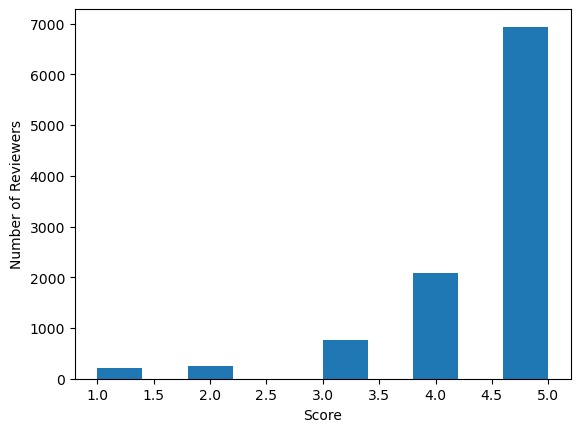

In [30]:
plt.hist(df_1['Score'])
plt.xlabel('Score')
plt.ylabel('Number of Reviewers')
plt.show()

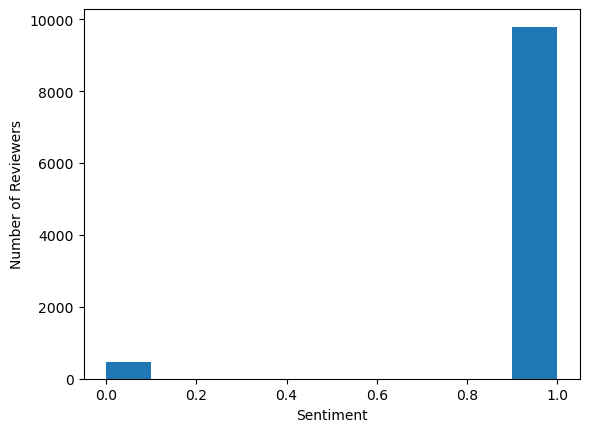

In [31]:
plt.hist(df_1['Sentiments'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviewers')
plt.show()

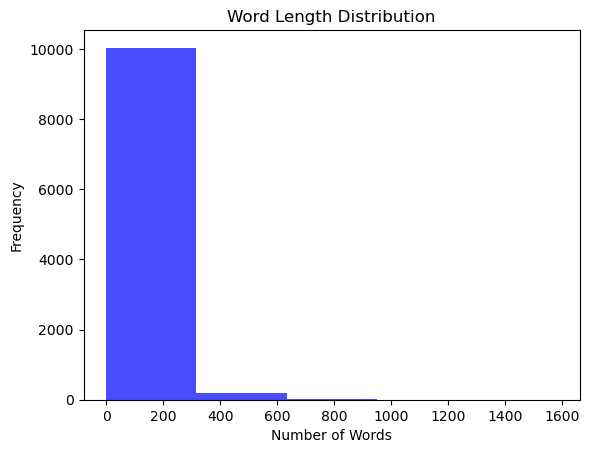

In [32]:
#Review of the Word Length Distribution
word_lengths = df_1['Review'].apply(lambda x: len(x.split()))
plt.hist(word_lengths, bins=5, alpha=0.7, color='blue')
plt.title("Word Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

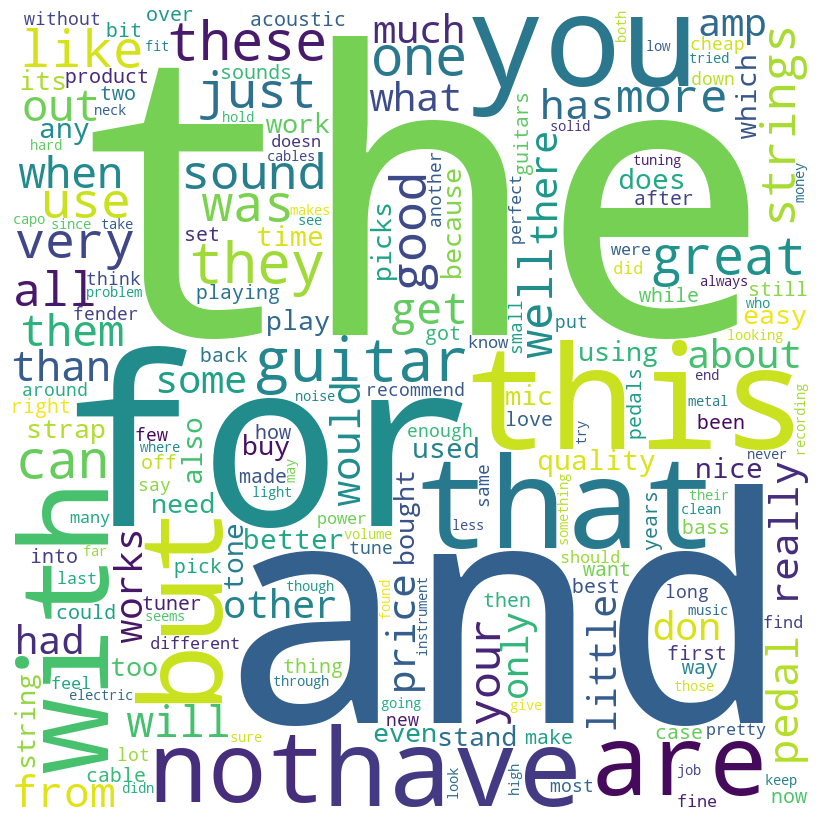

In [33]:
#Word Cloud Visualization
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [34]:
print(df_1.shape)
print(df_1.head)

(10261, 3)
<bound method NDFrame.head of        Score                                             Review  Sentiments
0          5  not much write about here but does exactly wha...           1
1          5  the product does exactly should and quite affo...           1
2          5  the primary job this device block the breath t...           1
3          5  nice windscreen protects mxl mic and prevents ...           1
4          5  this pop filter great looks and performs like ...           1
...      ...                                                ...         ...
10256      5                      great just expected thank all           1
10257      5  been thinking about trying the nanoweb strings...           1
10258      4  have tried coated strings the past including e...           1
10259      4  well made elixir and developed with taylor gui...           1
10260      4  these strings are really quite good but wouldn...           1

[10261 rows x 3 columns]>


In [35]:
df_1['Review']

0        not much write about here but does exactly wha...
1        the product does exactly should and quite affo...
2        the primary job this device block the breath t...
3        nice windscreen protects mxl mic and prevents ...
4        this pop filter great looks and performs like ...
                               ...                        
10256                        great just expected thank all
10257    been thinking about trying the nanoweb strings...
10258    have tried coated strings the past including e...
10259    well made elixir and developed with taylor gui...
10260    these strings are really quite good but wouldn...
Name: Review, Length: 10261, dtype: object

In [36]:
# IF review is bigger than 150 words, it will be truncated "post" or after the 150th word
trunc_type = 'post'
oov_tok = '<OOV>'

In [37]:
# Split the data into train and test sets
X = df_1['Review']
y = df_1['Sentiments']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)
print ('Total Observation: ', len(df_1))
print ('Training Observation: ', len(x_train))
print ('Test Observation: ', len(x_test))

Total Observation:  10261
Training Observation:  7182
Test Observation:  3079


### B2: Tokenization

The goal of the tokenization process is to make the text readable for machine learning by changing the data from an unstructured string into a numerical data structure (Menzli, 2023). It essentially splits individual words into tokens so that they can be easily classified and ready for further processing. Before tokenizing the dataset, we processed both the x_test and x_train datasets using stopword and stemming. We use the NLTK library to implement stopword whose sole function is to essentially remove common words such as 'the' 'and' 'i'(NLTK Stop Words, 2021). Stemming was also applied to the datasets to transform all words to their base words (i.e. 'flying' into 'fly') (GeeksforGeeks, 2023a). The stemmer function also comes from the NLTK library. The NLTK packages were imported at the very top of jupyter notebook. The tokenization and preprocess code has been provided below.

In [38]:
# Create a tokenizer
tokenizer =  Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Fit tokenizer on the training data
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index

#Print Word Index
print('Word Index: ', word_index)

Word Index:  {'<OOV>': 1, 'the': 2, 'and': 3, 'for': 4, 'this': 5, 'you': 6, 'that': 7, 'with': 8, 'but': 9, 'have': 10, 'are': 11, 'not': 12, 'guitar': 13, 'they': 14, 'these': 15, 'one': 16, 'can': 17, 'great': 18, 'was': 19, 'like': 20, 'very': 21, 'use': 22, 'good': 23, 'just': 24, 'sound': 25, 'strings': 26, 'all': 27, 'more': 28, 'well': 29, 'your': 30, 'out': 31, 'will': 32, 'when': 33, 'them': 34, 'get': 35, 'pedal': 36, 'from': 37, 'than': 38, 'would': 39, 'has': 40, 'price': 41, 'really': 42, 'what': 43, 'other': 44, 'about': 45, 'amp': 46, 'there': 47, 'little': 48, 'some': 49, 'much': 50, 'had': 51, 'don': 52, 'quality': 53, 'works': 54, 'only': 55, 'used': 56, 'which': 57, 'also': 58, 'better': 59, 'nice': 60, 'any': 61, 'time': 62, 'does': 63, 'tone': 64, 'easy': 65, 'strap': 66, 'too': 67, 'because': 68, 'bought': 69, 'using': 70, 'need': 71, 'stand': 72, 'even': 73, 'mic': 74, 'play': 75, 'picks': 76, 'string': 77, 'buy': 78, 'its': 79, 'playing': 80, 'off': 81, 'work':

### B2.a: Stopword, and Stemming Preprocessing and Sequence

The code to implement stopword, stemming, and sequencing has been listed below.

In [39]:
#Initialize Models
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

#Stopword, Stemming Preprocessing
x_train_stop = [' '.join([word for word in review.split() if word.lower() not in stop_words]) for review in x_train]
x_train_stemmed = [' '.join([stemmer.stem(word) for word in review.split()]) for review in x_train_stop]
x_test_stop = [' '.join([word for word in review.split() if word.lower() not in stop_words]) for review in x_test]
x_test_stemmed = [' '.join([stemmer.stem(word) for word in review.split()]) for review in x_test_stop]

#Apply sequencing
x_train_sequences = tokenizer.texts_to_sequences(x_train_stemmed)
x_test_sequences = tokenizer.texts_to_sequences(x_test_stemmed)

### B3: Padding Process

Since we are dealing with batched input data of different lengths, we need to convert them to a fixed size for more efficient processing and training. Padding adds a special token to ensure that shorter text sequences will have the same length as the longest sequence in the batch, up to the maximum length specified (or default) accepted by the model (Padding and Truncation, n.d.). In our process, we used 'post' padding, which means the padding occurs after the sequence. We use the function pad_sequences which comes from the Tensorflow library. The code for padding implementation has been provided below. A screenshot of the padding can be found below with the label 'B3.a. Screenshot of Padding Sequence'.

In [40]:
#Apply padding on x_train
x_train_padded = pad_sequences(x_train_sequences, maxlen=max_sequence_length, padding='post', truncating=trunc_type)

#Apply padding to x_test
x_test_padded = pad_sequences(x_test_sequences, maxlen=max_sequence_length, padding='post')

### B3.a. Screenshot of Padded Sequence

In [41]:
print("\nx_train Pad Sequences:")
print(x_train_padded[0,:])


x_train Pad Sequences:
[2043    1  380 2043  857 2943 4244 1228    1 1211  191   29  123 2043
  204 4625 1211  191    1  123  308   44 1460  309  985  123  435  101
 2943 4244    1  101  204 4625  428  302  388  191 2955    1    1   23
  118    1    1   75 1320 1211  261  112   97  112   69  123  123    1
 1211    0    0    0    0    0    0    0    0    0    0    0    0    0]


In [42]:
print("\nx_test Pad Sequences:")
print(x_test_padded[0,:])


x_test Pad Sequences:
[  69  592    1 2355 4858  618 1054    1  107  110   94    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0]


### B4: Categories of Sentiment and Activation function

For our data, we identified 18743 unique words, and we created a new column called 'Sentiment' which transformed our data from the 'Score' column into a Sentiment category of 1 or 0 with 1 being positive and 0 being negative. Our activation function for the final dense layer of the neural network will be to use Sigmoid as we have 2 predictor labels of 1 and 0.

### B5: Steps to Prepare Data

For our data preparation, we first imported all the necessary libraries into Jupyter Notebook and then use the json library to import the JSON dataset into Jupyter Notebook

We then rename our Columns for readability.

We then did some standard data preprocessing such as removing unusual characters, null values, lowercasing, etc.

Max word length was also calculated to see our longest review. Word frequency was also calculated to identify the most common word. Vocab size, embedding length, and max sequence length were also calculated for our model.

Then we created a 'Sentiment' column using 'Score' 1-2 as 0 (Negative) and 3-5 as 1 (Positive).

We looked at 'Score' and 'Sentiments' descriptive statistics to get an idea of it's mean, count, and standard deviation.

Next, We did exploratory visualization and plotted histograms on those same columns so that we can have a grasp on how the data is spread across the dataset. A word cloud visualization was also plotted based on word frequency.

Then the data was split into training and testing datasets of 80/20 (7182 Training Observation, 3079 Test Observation)

Stopword and stemming were then applied along with Tokenization to x_train and x_test datasets

Post-padding was then applied to both mentioned datasets.

Fit the final model and convert test/train into numpy arrays.

### B6: Prepared Copy of Dataset

In [43]:
#Convert
x_test_pad = pd.DataFrame(x_test_padded)
x_train_pad = pd.DataFrame(x_train_padded[1:], columns=x_train_padded[0])
y_test_pd = pd.DataFrame(y_test)
y_train_pd = pd.DataFrame(y_train)

In [44]:
#Export to CSV
df_1.to_csv('D213_NLP_cleaned_data2.csv')
x_test_pad.to_csv('Padded_X_test.csv')
x_train_pad.to_csv('Padded_X_train.csv')
y_train_pd.to_csv('Padded_y_train.csv')
y_test_pd.to_csv('Padded_y_test.csv')

## Part III: Network Architecture



In [45]:
# Creating model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_d, input_length=max_sequence_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(9, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 70, 12)            224916    
                                                                 
 global_average_pooling1d (  (None, 12)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 9)                 117       
                                                                 
 dense_1 (Dense)             (None, 1)                 10        
                                                                 
Total params: 225043 (879.07 KB)
Trainable params: 225043 (879.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### C1: Model Summary

The model.summary() code provides a summary of the model. It visualizes the components of the Keras model, including names of layers, type, shape, and the number of trainable parameters (Team, n.d.). The summary output is provided below.

In [46]:
# Compiling the model and show summary
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 70, 12)            224916    
                                                                 
 global_average_pooling1d (  (None, 12)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 9)                 117       
                                                                 
 dense_1 (Dense)             (None, 1)                 10        
                                                                 
Total params: 225043 (879.07 KB)
Trainable params: 225043 (879.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


### C2: Network Architecture Layers

The model uses 4 layers with the Input layer being the Embedding layer. The next layer is the global_average_pooling1d layer followed by a dense layer. The final layer or the output is a dense layer. The network uses a total of 225,043 parameters. For the output layer, a Sigmoid function activation was used.

### C3: Hyperparameters

Activation function used: One of the activation functions used is ReLu, which is simple, effective at overcoming the limitations of other activation functions, and is a better choice for hidden dense layers (Elleh, n.d.). Our output layer or final layer uses Sigmoid because the results are within the range of 1 and 0. 

Number of nodes per layer: Our Embedding or Input layer has 70 nodes as calculated by our embedding length code. The GlobalAveragePooling1D layer has 12 nodes. Our hidden layer uses the 2/3 rule calculation (Hidden Layer Size ≈ (Input Layer Size + Output Layer Size) * 2/3) which calculates the number of nodes to 9 (Karsoliya, n.d.). Our output or final layers has 1 node because of our binary classification (Admin, 2023).

Loss Function: The loss function used for the model is binary cross entropy which is generally used for binary classification models (Understanding Categorical Cross-Entropy Loss, Binary Cross-Entropy Loss, Softmax Loss, Logistic Loss, Focal Loss and All Those Confusing Names, 2018).

Optimizer: The "adam" optimizer is used for its performance and iterative nature in adjusting weight based on the training data (Elleh, n.d.).

Stopping Criteria: The EarlyStopping function from the Keras library was used to monitor the neural network and stop it from overfitting the training data so that we can improve the generalization of the final model (Elleh, n.d.). It essentially stops training the model as soon as the validation score no longer improves.

Evaluation Metric: The accuracy metric was used to evaluate how well the neural network can classify reviews based on sentiment. For our model, the training accuracy is 98%, test accuracy is 95%, and validation accuracy is 95%.

In [47]:
#Convert to Pandas
x_test_f = pd.Series(x_test)
y_test_f = pd.Series(y_test)
y_train_f = pd.Series(y_train)

In [48]:
#Verify new dataset's shape
print(x_test_f.shape)
print(y_train_f.shape)
print(y_test_f.shape)

(3079,)
(7182,)
(3079,)


In [49]:
#Review length for setting i
print(len(y_train_f))
print(len(y_test_f))

7182
3079


## Part IV: Model Evaluation

In [50]:
#Define Stop Measure
early_stop_measure = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

In [51]:
# Running the model for 20 epochs without providing early stop measure
history = model.fit(x_train_padded, y_train_f, epochs=20, validation_data=(x_test_padded, y_test_f), verbose = True)

Epoch 1/20
225/225 [==============================] - 2s 4ms/step - loss: 0.3562 - accuracy: 0.9534 - val_loss: 0.1832 - val_accuracy: 0.9545
Epoch 2/20
225/225 [==============================] - 1s 3ms/step - loss: 0.1789 - accuracy: 0.9545 - val_loss: 0.1802 - val_accuracy: 0.9545
Epoch 3/20
225/225 [==============================] - 1s 3ms/step - loss: 0.1752 - accuracy: 0.9545 - val_loss: 0.1774 - val_accuracy: 0.9545
Epoch 4/20
225/225 [==============================] - 1s 3ms/step - loss: 0.1708 - accuracy: 0.9545 - val_loss: 0.1758 - val_accuracy: 0.9545
Epoch 5/20
225/225 [==============================] - 1s 3ms/step - loss: 0.1666 - accuracy: 0.9545 - val_loss: 0.1727 - val_accuracy: 0.9545
Epoch 6/20
225/225 [==============================] - 1s 2ms/step - loss: 0.1611 - accuracy: 0.9545 - val_loss: 0.1703 - val_accuracy: 0.9545
Epoch 7/20
225/225 [==============================] - 1s 3ms/step - loss: 0.1548 - accuracy: 0.9545 - val_loss: 0.1666 - val_accuracy: 0.9545
Epoch 

### D1. Stopping Critiera

One of the reasons for implementing early stop criteria rather than explicitly defining its value is that it can prevent the model from overfitting. With the code above, we can see that by defining the epoch at 20, it continuously ran the code until its defined epoch was reached, regardless of how well the model was performing. However, by implementing early stop loss in the code below, it only ran as much as it was needed once its validations scores stopped improving (Elleh, n.d.). A screenshot of the final training epoch is listed below under the label "D1.a. Screenshot of EarlyStopping on Final Training Epoch".

In [52]:
#Running model with Stop Measure but no batch
history1 = model.fit(x_train_padded, y_train_f, epochs=20, validation_data=(x_test_padded, y_test_f), verbose = True, callbacks=early_stop_measure)

Epoch 1/20
225/225 [==============================] - 0s 2ms/step - loss: 0.0576 - accuracy: 0.9832 - val_loss: 0.1868 - val_accuracy: 0.9571
Epoch 2/20
225/225 [==============================] - 0s 2ms/step - loss: 0.0540 - accuracy: 0.9854 - val_loss: 0.1993 - val_accuracy: 0.9568
Epoch 3/20
225/225 [==============================] - 0s 2ms/step - loss: 0.0508 - accuracy: 0.9865 - val_loss: 0.2102 - val_accuracy: 0.9568


### D1.a. Screenshot of EarlyStopping on Final Training Epoch

In [53]:
#Revalidate model with batch
history2 = model.fit(x_train_padded, y_train_f, epochs=20, validation_data=(x_test_padded, y_test_f), verbose = True, batch_size = 32, callbacks=early_stop_measure)

Epoch 1/20
225/225 [==============================] - 0s 2ms/step - loss: 0.0473 - accuracy: 0.9880 - val_loss: 0.2167 - val_accuracy: 0.9568
Epoch 2/20
225/225 [==============================] - 0s 2ms/step - loss: 0.0447 - accuracy: 0.9890 - val_loss: 0.2206 - val_accuracy: 0.9555
Epoch 3/20
225/225 [==============================] - 0s 2ms/step - loss: 0.0416 - accuracy: 0.9898 - val_loss: 0.2331 - val_accuracy: 0.9568


In [54]:
#Review model history2
history2.history

{'loss': [0.047262199223041534, 0.04472775012254715, 0.04158826172351837],
 'accuracy': [0.9880256056785583, 0.9890002608299255, 0.9898356795310974],
 'val_loss': [0.2167372852563858, 0.22056226432323456, 0.23311559855937958],
 'val_accuracy': [0.9568041563034058, 0.9555050134658813, 0.9568041563034058]}

In [55]:
#Review model accuracy on test dataset (data not seen by model)
score = model.evaluate(x_test_padded, y_test_f, verbose = 0)
print(f'Test loss: {score[0]} \nTest accuracy: {score[1]}')

Test loss: 0.23311559855937958 
Test accuracy: 0.9568041563034058


In [56]:
#Review model accuracy on test dataset (data not seen by model)
history_test = model.fit(x_test_padded, y_test_f, validation_split =0.3, callbacks=[early_stop_measure])

68/68 [==============================] - 0s 3ms/step - loss: 0.2208 - accuracy: 0.9476 - val_loss: 0.1794 - val_accuracy: 0.9470


In [57]:
#Prediction on Model
predictions = model.predict(x_test_padded)

97/97 [==============================] - 0s 675us/step


In [58]:
#Set i
i = 2000

#Verify Sentiment by comparing against test
print('Predicted review text:', x_test_f.iloc[i], '\n')
print('Predicted:', 'Negative' if predictions[i][0] >= 0.5 else 'Positive', 'review')
print('Actual: ', 'Negative' if y_test_f.iloc[i] == 0 else 'Positive', 'review')
print('Sentiment Score: ', y_test_f.iloc[i])

Predicted review text: strings rust very easily yield fairly poor tone and break often though they have the same bending ability 

Predicted: Negative review
Actual:  Negative review
Sentiment Score:  0


In [59]:
#Define function to plot Learning Curve
def plot_learningCurve(history, epochs):
        epoch_range = range(1, epochs+1)
        plt.plot(epoch_range, history2.history['accuracy'])
        plt.plot(epoch_range, history2.history['val_accuracy'])
        plt.title('Model Accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Val'], loc='upper left')
        plt.show()
        
        plt.plot(epoch_range, history2.history['loss'])
        plt.plot(epoch_range, history2.history['val_loss'])
        plt.title('Model Loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Val'], loc='upper left')
        plt.show()

### D2. Training Process

Visualization of the Model loss and chosen evaluation metric ("Accuracy") has been provided below.

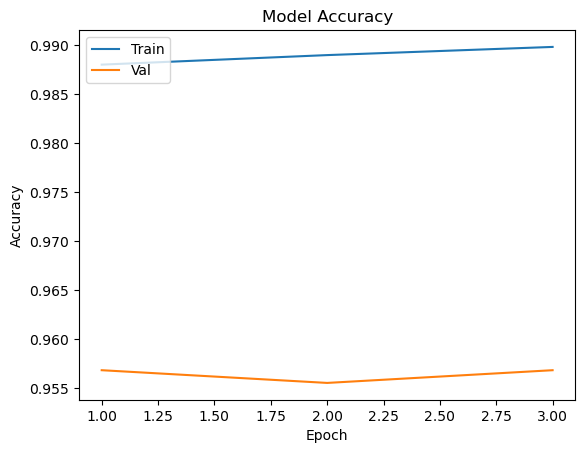

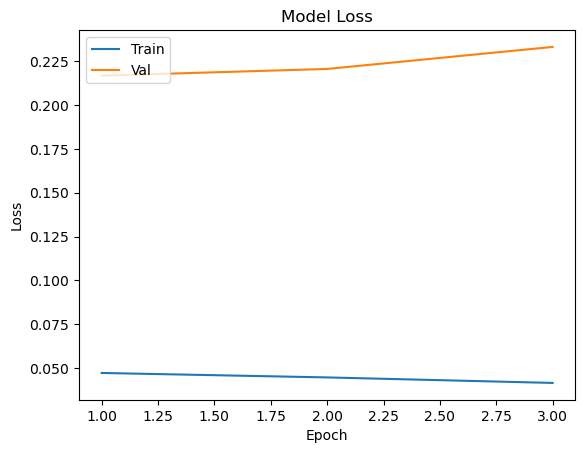

In [60]:
#Plot Learning Curve
plot_learningCurve(history2, 3)

### D3. Fit

In reviewing the Visualization stated in D2, we can see that the Model Accuracy for the Training set and validation set is quite high with both above 95%. The model loss was also low which is great at only 23% for the validation set and 5% for the training set. The numbers seem good but in the visualization, the gap suggests that we may have overfitting in our data. An early stop was used to prevent overfitting but the issue seems to be related to the dataset itself. During exploratory analysis, we found a severe imbalance of classes in our reviews with negative reviews only representing about 5% of total reviews. According to Brownlee (2021), due to the imbalance of data in our data classes, "accuracy can become an unreliable measure in model performance." This is known as the Accuracy Paradox, whereby good performance in the minority class will be preferred over good performance in both classes. Resampling of data was considered to prevent overfitting but, given that the synthesized samples may not truly belong to the minority, they may not realistically represent real-world problems (Stop Oversampling for Class Imbalance Learning: A Review, 2022). In this case, our data may be skewed one way due to the severe imbalance of classes. To better assess the fit of our model, we need more data, specifically negative reviews so that we can better train our model. 

### D4. Predictive Accuracy

The Accuracy plot visualization from D2 as well as the results printed below suggests that the model's metric "accuracy", is good at predicting with 95% accuracy (Test Accuracy: 95%, Test loss: 23%). This is to say, that given a review, it can predict with 95% accuracy that it will be the correct sentiment for the review. Again, going back to D3 in assessing the fit of our model, we may have an Accuracy Paradox.

In [61]:
print(f'Test loss: {score[0]} \nTest accuracy: {score[1]}')

Test loss: 0.23311559855937958 
Test accuracy: 0.9568041563034058


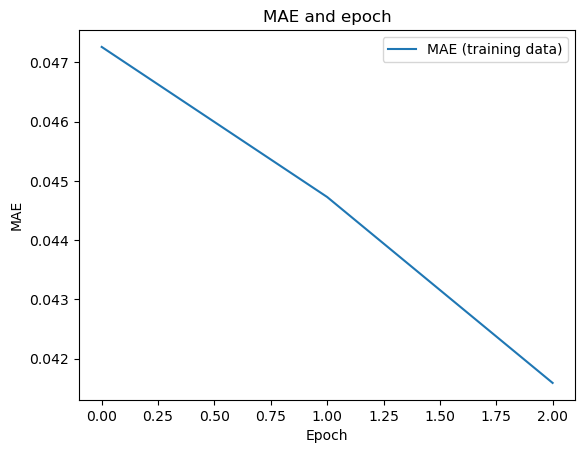

In [62]:
# Visual comparison of MAE and Epoch
plt.plot(history2.history['loss'], label='MAE (training data)')
plt.title('MAE and epoch')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()
plt.show()

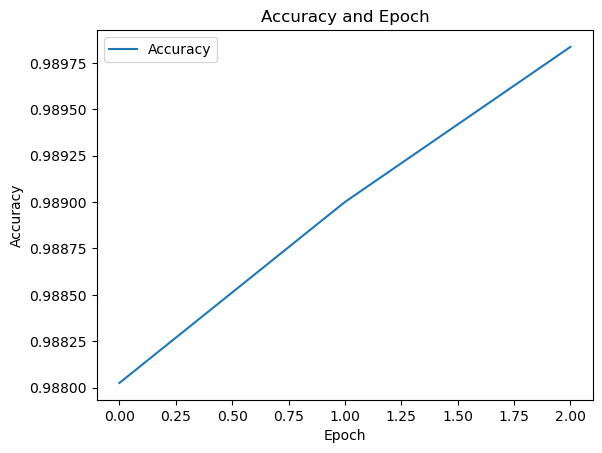

In [63]:
# Visual comparison of Accuracy and Epoch
plt.plot(history2.history['accuracy'], label='Accuracy')
plt.title('Accuracy and Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [64]:
#Predict against x_train_padding
prediction_labels = model.predict(x_train_padded)
binary_predictions = (prediction_labels > 0.5).astype(int)

225/225 [==============================] - 0s 659us/step


In [65]:
# Calculate F1 score
f1 = f1_score(y_train_f, binary_predictions)

# Calculate accuracy, precision, recall, and confusion matrix
accuracy = accuracy_score(y_train_f, binary_predictions)
precision = precision_score(y_train_f, binary_predictions)
recall = recall_score(y_train_f, binary_predictions)
confusion = confusion_matrix(y_train_f, binary_predictions)
report = classification_report(y_train_f, binary_predictions)

print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("\nClassification Report:\n", report)

F1 Score: 0.9940233236151603
Accuracy: 0.9885825675299359
Precision: 0.9932993445010925
Recall: 0.9947483588621444

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.87       327
           1       0.99      0.99      0.99      6855

    accuracy                           0.99      7182
   macro avg       0.94      0.93      0.93      7182
weighted avg       0.99      0.99      0.99      7182



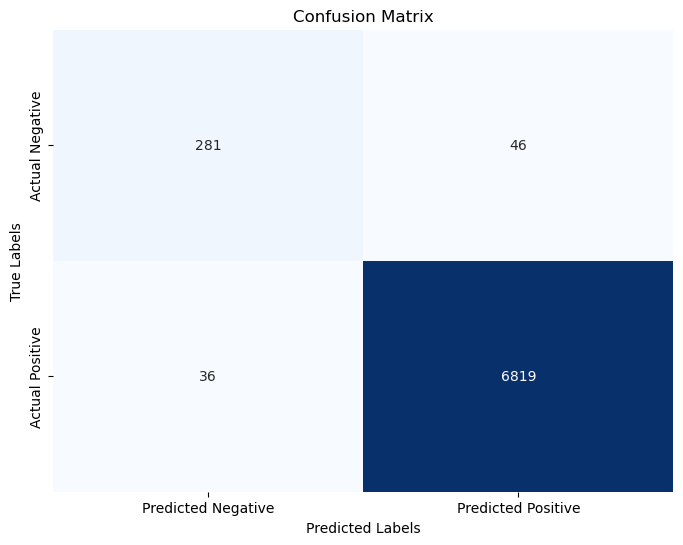

In [66]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Part V

### E. Code to Save Model

In [67]:
model.save('NLP model.keras')

In [68]:
model = keras.models.load_model('NLP model.keras')

In [69]:
model

### F. Functionality

The functionality of all neural networks is to take in data, learn it and predict future unseen data. For our model, we had 10,261 total customer review that was split into training and testing datasets (Training Observation: 7182, Test Observation:  3079). The training dataset was used to build the model and the test dataset was used to validate the model. The model learn based on Review and Sentiment and predicted when given a review, what was the Sentiment value of the review (0 for Negative, 1 for Positive). Based on how well the model was trained and the evaluation of its model metrics, we can then make an informed decision to see if the model performed correctly or if there were other things affecting its performance. The impact of this model indicates that though accuracy was high at 95%, the data seems to be overfitting and may not be representative of real-world results. Therefore, it may not be as accurate at predicting sentiment based on customers' reviews.

### G. Recommended Course of Action

Our data showed remarkably high accuracy but, due to the imbalance of our classes, we cannot readily make an informed decision to our stakeholders in regards to how well our model can predict reviews. Rather, the recommended course of action would be to rectify the model by reiterating it and either perform oversampling or use other model functions such as soft max activation and other parameters to compare against this model.

## Part V

### H. Reporting

This model was prepared in Jupyter Notebook

### I. Third Party Sources

This model was prepared in Jupyter Notebook

09. Milestone Project 2: SkimLit 📄🔥 - Zero to Mastery TensorFlow for Deep Learning. (n.d.). https://dev.mrdbourke.com/tensorflow-deep-learning/09_SkimLit_nlp_milestone_project_2/

Elleh, F. (n.d.). Welcome D213 Advance Data Analytics - Task 2 [Slide show].

GeeksforGeeks. (2023). Removing stop words with NLTK in Python. GeeksforGeeks. https://www.geeksforgeeks.org/removing-stop-words-nltk-python/

How can I preprocess NLP text (lowercase, remove special characters, remove numbers, remove emails, etc) in one pass? (n.d.). Stack Overflow. https://stackoverflow.com/questions/54396405/how-can-i-preprocess-nlp-text-lowercase-remove-special-characters-remove-numb

lemmatize an entire column using lambda function. (n.d.). Stack Overflow. https://stackoverflow.com/questions/63807411/lemmatize-an-entire-column-using-lambda-function

NLP stopword removal, stemming and lemmatization. (n.d.). Stack Overflow. https://stackoverflow.com/questions/71590358/nlp-stopword-removal-stemming-and-lemmatization

NLP - Text Pre-Processing II (Tokenization and Stop Words) - Michael Fuchs Python. (2021, May 25). https://michael-fuchs-python.netlify.app/2021/05/25/nlp-text-pre-processing-ii-tokenization-and-stop-words/

Zach. (2020). How to convert a JSON file to a Pandas DataFrame. Statology. https://www.statology.org/json-to-pandas-dataframe/

Zach. (2022b). Pandas: How to Remove Special Characters from Column. Statology. https://www.statology.org/pandas-remove-special-characters/

### J. Source

Admin. (2023, July 25). How many output neurons for binary classification, one or two? For Machine Learning. https://androidkt.com/how-many-output-neurons-for-binary-classification-one-or-two/#:~:text=When%20using%20the%20one-node%20technique%20for%20binary%20classification%2C,the%20class%20that%20is%20encoded%20as%201%20%28cat%29.

Brownlee, J. (2021). Failure of classification accuracy for imbalanced class distributions. MachineLearningMastery.com. https://machinelearningmastery.com/failure-of-accuracy-for-imbalanced-class-distributions/#:~:text=When%20the%20skew%20in%20the%20class%20distributions%20are,learning%20practitioner%20and%20the%20intuitions%20for%20classification%20accuracy.

D213 Sentiment Analysis i. (n.d.). Panopto. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=a1e9802c-5808-4287-a7e5-aed601580d89

GeeksforGeeks. (2023a). Introduction to stemming. GeeksforGeeks. https://www.geeksforgeeks.org/introduction-to-stemming/

Introducing TensorFlow feature columns. (n.d.). https://developers.googleblog.com/2017/11/introducing-tensorflow-feature-columns.html

Karsoliya, S. (n.d.). Approximating Number of Hidden layer neurons in  Multiple Hidden Layer BPNN Architecture. International Journal of Engineering Trends and Technology. http://ijettjournal.org/volume-3/issue-6/IJETT-V3I6P206.pdf

Menzli, A. (2023). Tokenization in NLP: Types, challenges, examples, tools. neptune.ai. https://neptune.ai/blog/tokenization-in-nlp

Padding and truncation. (n.d.). https://huggingface.co/docs/transformers/pad_truncation

Stop Oversampling for Class Imbalance Learning: A review. (2022). IEEE Journals & Magazine | IEEE Xplore. https://ieeexplore.ieee.org/document/9761871

Team, K. (n.d.). Keras documentation: The Model class. https://keras.io/api/models/model/

Teja, S. (2021, December 14). What are Stop Words.How to remove stop words. | Medium. Medium. https://medium.com/@saitejaponugoti/stop-words-in-nlp-5b248dadad47

Understanding Categorical Cross-Entropy Loss, Binary Cross-Entropy Loss, Softmax Loss, Logistic Loss, Focal Loss and all those confusing names. (2018, May 23). https://gombru.github.io/2018/05/23/cross_entropy_loss/